In [1]:
import os

os.chdir("../..")

import utils

In [2]:
outputfolder = os.getcwd() + '/output/'
datafolder = os.getcwd() + '/datasets/PTB-XL/'
sampling_rate = 100
task = 'priority'
experiment_name = 'exp4'

data, raw_labels = utils.load_dataset(datafolder, sampling_rate=sampling_rate)
labels = utils.compute_label_aggregations(raw_labels, datafolder, task)
data, labels, Y, _ = utils.select_data(data, labels, task, 0, outputfolder+experiment_name+'/data/')

In [3]:
X_test = data[labels.strat_fold == 10]
y_test = Y[labels.strat_fold == 10]

X_val = data[labels.strat_fold == 9]
y_val = Y[labels.strat_fold == 9]

X_train = data[labels.strat_fold <= 8]
y_train = Y[labels.strat_fold <= 8]

n_classes = y_train.shape[1]

print(f"This experiment has {n_classes} classes")

X_train = X_train[:,:,0]
X_test = X_test[:,:,0]
X_val = X_val[:,:,0]

This experiment has 43 classes


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
results = pd.read_csv("output/results_ptbxl.csv", index_col="Method")
results = results['exp4_AUC'].to_frame()
results = results[results['exp4_AUC']!='---']

In [6]:
results

,exp4_AUC
Method,
models\Wavelet+NN+lead1,0.735(24)
models\Wavelet+NN,0.818(20)
models\AttNet+Baseline+lead1,0.848(15)
models\NewWavelet+NN+lead1,0.766(25)
models\Wavelet+RF+lead1,0.735(24)
models\AttNet+dp02+lead1,0.830(15)
models\Simple+Baseline,0.819(17)
models\AlexNetAttn+lead1,0.834(12)
models\InceptionSE+lead1,0.758(14)


In [7]:
results['AUC'] = results['exp4_AUC'].str.extract(r'(\d+\.\d+)', expand=False).astype(float)
results['AUC CI'] = results['exp4_AUC'].str.extract(r'\((\d+)\)', expand=False).astype(float)
results['AUC CI'] = results['AUC CI']/1000
results.index = pd.Categorical(results.index)
results.sort_index(inplace=True)
results.index = results.index.str.replace(r'models\\', '')
results = results.sort_values("AUC")

C:\Users\agarw\AppData\Local\Temp\ipykernel_33068\4282170335.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  results.index = results.index.str.replace(r'models\\', '')


In [8]:
results = results[results['AUC']>0.8]
results

,exp4_AUC,AUC,AUC CI
VGGNet+lead1,0.805(15),0.805,0.015
LeNetAttn+lead1,0.807(14),0.807,0.014
Wavelet+NN,0.818(20),0.818,0.020
LeNet+lead1,0.819(16),0.819,0.016
Simple+Baseline,0.819(17),0.819,0.017
AttNet+dp02+lead1,0.830(15),0.830,0.015
AlexNetAttn+lead1,0.834(12),0.834,0.012
AlexNet+lead1,0.838(16),0.838,0.016
ResNet+Baseline+lead1,0.845(14),0.845,0.014
AttNet+Baseline+lead1,0.848(15),0.848,0.015


(0.75, 0.90615)

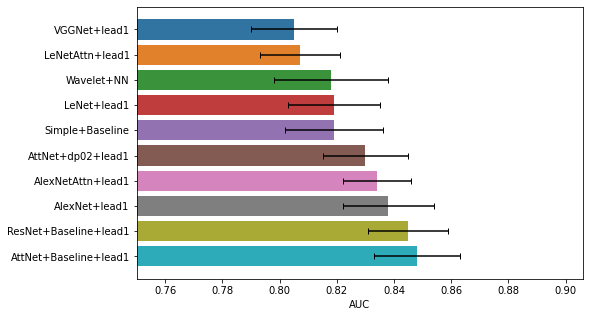

In [12]:
plt.figure(figsize=(8,5))
ax = sns.barplot(y=results.index, x=results['AUC'], orient='h')
ax.errorbar(y=results.index, xerr=results['AUC CI'], x=results['AUC'], capsize=3, ecolor='black', linestyle='none')
plt.xlim(left=0.75)

In [62]:
methods = results.index.to_list()

In [63]:
raw_test_preds = []
raw_val_preds = []

for method in methods:
    test = np.load(f"output/exp4/models/{method}/y_test_pred.npy", allow_pickle=True)
    val = np.load(f"output/exp4/models/{method}/y_val_pred.npy", allow_pickle=True)
    raw_test_preds += [test]
    raw_val_preds += [val]

In [64]:
import pickle

with open(r"C:\Mohit\Imperial\fyp-hearts\output\exp4\data\mlb.pkl", 'rb') as f:
    mlb = pickle.load(f).classes_
y_test =np.load(r"C:\Mohit\Imperial\fyp-hearts\output\exp4\data\y_test.npy", allow_pickle=True)
y_val =np.load(r"C:\Mohit\Imperial\fyp-hearts\output\exp4\data\y_val.npy", allow_pickle=True)

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score

In [65]:
mean_ensemble_vals = pd.DataFrame(columns=mlb)
mean_raw_test = np.array(raw_test_preds).mean(axis=0)
ensemble_results['Mean'] = [roc_auc_score(y_test, mean_raw_test), "---"]
